In [7]:
import pandas as pd
import os
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np


# Check if preprocessed dataSet is present for Classification
if not(os.path.isfile("Data/Cleaned/loanDataForClassification.csv") & os.path.isfile("Data/Cleaned/rejectLoanDataForClassification.csv")):
    rejectLoanFile = "Data/Cleaned/cleaned_reject_loandata.csv"
    loanFile = "Data/Cleaned/cleaned_loandata.csv"

    featuresFromRejectData = ['Amount Requested', 'Risk_Score', 'Debt-To-Income Ratio', 'State', 'Employment Length']
    featuresFromLoanData = ['loan_amnt', 'risk_score', 'dti', 'addr_state', 'emp_length', 'loan_status']


    rejectData = pd.read_csv(rejectLoanFile, encoding = "ISO-8859-1", low_memory= False, usecols = featuresFromRejectData)
    loanData = pd.read_csv(loanFile, encoding = "ISO-8859-1", low_memory= False, usecols = featuresFromLoanData)
    
    rejectData['Debt-To-Income Ratio'] = rejectData['Debt-To-Income Ratio'].str.replace('%','')
    rejectData['Debt-To-Income Ratio'] = rejectData['Debt-To-Income Ratio'].astype(np.float64)
    
    rejectData['Issue_Loan_Flag'] = 0
    loanData['Issue_Loan_Flag'] = 1

        # loanData['loan_status'].unique()
    loanData.loc[(loanData['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid'), ['Issue_Loan_Flag']] = 0
    loanData.loc[(loanData['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'), ['Issue_Loan_Flag']] = 0
    loanData.loc[(loanData['loan_status'] == 'Charged Off'), ['Issue_Loan_Flag']] = 0
    loanData.loc[(loanData['loan_status'] == 'Default'), ['Issue_Loan_Flag']] = 0
    featuresFromLoanData = ['loan_amnt', 'risk_score', 'dti', 'addr_state', 'emp_length', 'Issue_Loan_Flag']
    loanData = loanData[featuresFromLoanData]

        # Rename Columns
    columnNames = ['Amount_Requested', 'Risk_Score', 'Debt-To-Income_Ratio', 'State', 'Employment_Length', 'Issue_Loan_Flag']
    loanData.columns = columnNames
    rejectData.columns = columnNames




        # Save dataset for classification
    loanData.to_csv("Data/Cleaned/loanDataForClassification.csv", sep=',', index = False)
    rejectData.to_csv("Data/Cleaned/rejectLoanDataForClassification.csv", sep=',', index = False)

else:
    loanData = pd.read_csv("Data/Cleaned/loanDataForClassification.csv", encoding = "ISO-8859-1", low_memory= False)
    rejectData = pd.read_csv("Data/Cleaned/rejectLoanDataForClassification.csv", encoding = "ISO-8859-1", low_memory= False)

In [8]:
def NeuralNetworkClassifierAlgorithm(X_train,X_test, y_train, y_test):
    
    print("______________________START OF NEURAL NETWORK CLASSIFIER____________________")
    
    clf = MLPClassifier(solver = 'lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)

    clf.fit(X_train, y_train)




    pred = clf.predict(X_test)

    train_pred = clf.predict(X_train)

    # R-squared score of this model

    rsq = r2_score(y_train, train_pred)

    # MEAN ABSOLUTE ERROR
    mean_ae = mean_absolute_error(y_test, pred)

    # MEAN SQUARED ERROR
    mean_sqe = mean_squared_error(y_test, pred)

    # MEDIAN ABSOLUTE ERROR
    median_ae = median_absolute_error(y_test, pred)

    print("R-squared error : " + str(rsq) )

    print("MEAN ABSOLUTE ERROR  : " + str(mean_ae) )

    print("MEAN SQUARED ERROR : " + str(mean_sqe) )

    print("MEDIAN ABSOLUTE ERROR : " + str(median_ae) )


    print (accuracy_score(y_test, pred))


    # CONFUSION MATRIX
#     confusion_mat = confusion_matrix(y_test, pred, labels=[1, 2])
#     print(confusion_mat)
    
    print (pd.crosstab(y_test, pred, rownames=["Actual"], colnames=["Pred"]))
#     ROC Curve
    
    fpr, tpr, _ = roc_curve(y_test, pred)
    
    
    plt.figure()
    plt.plot(fpr, tpr, label = 'ROC Curve')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.title('ROC curve - Neural Network')
    plt.legend(loc="lower right")
    plt.show()

    print("______________________END OF Neural Network Classifier____________________")


______________________START OF NEURAL NETWORK CLASSIFIER____________________
R-squared error : -0.805407127228
MEAN ABSOLUTE ERROR  : 0.0235891861876
MEAN SQUARED ERROR : 0.0235891861876
MEDIAN ABSOLUTE ERROR : 0.0
0.976410813812
Pred          0
Actual         
0       9994669
1        241462


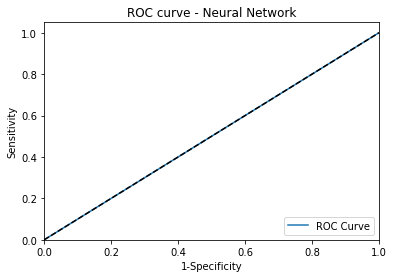

______________________END OF Neural Network Classifier____________________


In [9]:
# Split Dataset into train and test and prepare for training model
msk = np.random.rand(len(loanData)) < 0.8

trainLoanData = loanData[msk]

testLoanData = loanData[~msk]

msk = np.random.rand(len(rejectData)) < 0.1

trainRejectData = rejectData[msk]

testRejectData = rejectData[~msk]

trainData = pd.concat([trainLoanData, trainRejectData])

testData = pd.concat([testLoanData, testRejectData])

target = "Issue_Loan_Flag"

predictorVariables = ['Amount_Requested', 'Risk_Score', 'Debt-To-Income_Ratio', 'Employment_Length']

X_train = trainData[predictorVariables]
X_test = testData[predictorVariables]
y_train = trainData[target]
y_test = testData[target]

# trainData.shape
# testData.shape

NeuralNetworkClassifierAlgorithm(X_train,X_test, y_train, y_test)

______________________START OF NEURAL NETWORK CLASSIFIER____________________
R-squared error : -0.418719055959
MEAN ABSOLUTE ERROR  : 0.0264316968267
MEAN SQUARED ERROR : 0.0264316968267
MEDIAN ABSOLUTE ERROR : 0.0
0.973568303173
Pred          0
Actual         
0       8886712
1        241268


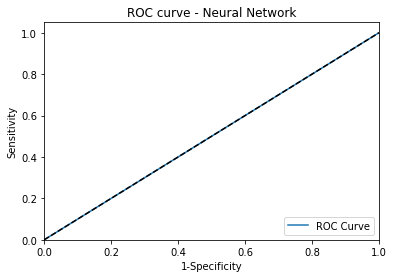

______________________END OF Neural Network Classifier____________________


In [10]:
# Split Dataset into train and test and prepare for training model
msk = np.random.rand(len(loanData)) < 0.8

trainLoanData = loanData[msk]

testLoanData = loanData[~msk]

msk = np.random.rand(len(rejectData)) < 0.2

trainRejectData = rejectData[msk]

testRejectData = rejectData[~msk]

trainData = pd.concat([trainLoanData, trainRejectData])

testData = pd.concat([testLoanData, testRejectData])

target = "Issue_Loan_Flag"

predictorVariables = ['Amount_Requested', 'Risk_Score', 'Debt-To-Income_Ratio', 'Employment_Length']

X_train = trainData[predictorVariables]
X_test = testData[predictorVariables]
y_train = trainData[target]
y_test = testData[target]


NeuralNetworkClassifierAlgorithm(X_train,X_test, y_train, y_test)

______________________START OF NEURAL NETWORK CLASSIFIER____________________
R-squared error : 0.0923023529502
MEAN ABSOLUTE ERROR  : 0.0596123023683
MEAN SQUARED ERROR : 0.0596123023683
MEDIAN ABSOLUTE ERROR : 0.0
0.940387697632
Pred          0       1
Actual                 
0       5339121  222605
1        123293  117441


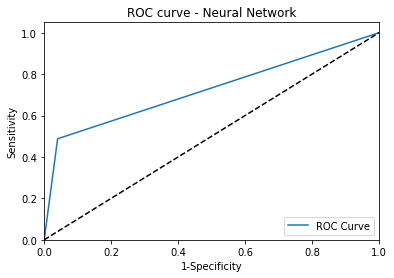

______________________END OF Neural Network Classifier____________________


In [11]:
# Split Dataset into train and test and prepare for training model
msk = np.random.rand(len(loanData)) < 0.8

trainLoanData = loanData[msk]

testLoanData = loanData[~msk]

msk = np.random.rand(len(rejectData)) < 0.5

trainRejectData = rejectData[msk]

testRejectData = rejectData[~msk]

trainData = pd.concat([trainLoanData, trainRejectData])

testData = pd.concat([testLoanData, testRejectData])

target = "Issue_Loan_Flag"

predictorVariables = ['Amount_Requested', 'Risk_Score', 'Debt-To-Income_Ratio', 'Employment_Length']

X_train = trainData[predictorVariables]
X_test = testData[predictorVariables]
y_train = trainData[target]
y_test = testData[target]

NeuralNetworkClassifierAlgorithm(X_train,X_test, y_train, y_test)

______________________START OF NEURAL NETWORK CLASSIFIER____________________
R-squared error : -0.107875291002
MEAN ABSOLUTE ERROR  : 0.0972936993554
MEAN SQUARED ERROR : 0.0972936993554
MEDIAN ABSOLUTE ERROR : 0.0
0.902706300645
Pred          0
Actual         
0       2239070
1        241327


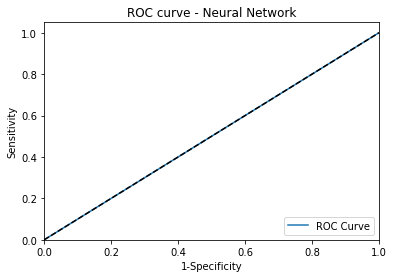

______________________END OF Neural Network Classifier____________________


In [12]:
# Split Dataset into train and test and prepare for training model
msk = np.random.rand(len(loanData)) < 0.8

trainLoanData = loanData[msk]

testLoanData = loanData[~msk]

msk = np.random.rand(len(rejectData)) < 0.8

trainRejectData = rejectData[msk]

testRejectData = rejectData[~msk]

trainData = pd.concat([trainLoanData, trainRejectData])

testData = pd.concat([testLoanData, testRejectData])

target = "Issue_Loan_Flag"

predictorVariables = ['Amount_Requested', 'Risk_Score', 'Debt-To-Income_Ratio', 'Employment_Length']

X_train = trainData[predictorVariables]
X_test = testData[predictorVariables]
y_train = trainData[target]
y_test = testData[target]

NeuralNetworkClassifierAlgorithm(X_train,X_test, y_train, y_test)